In [22]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Importing the dataset
dataset = pd.read_csv('./HealthData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values

In [24]:
#handling missing data

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='NaN',strategy='mean')
imputer=SimpleImputer().fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [25]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


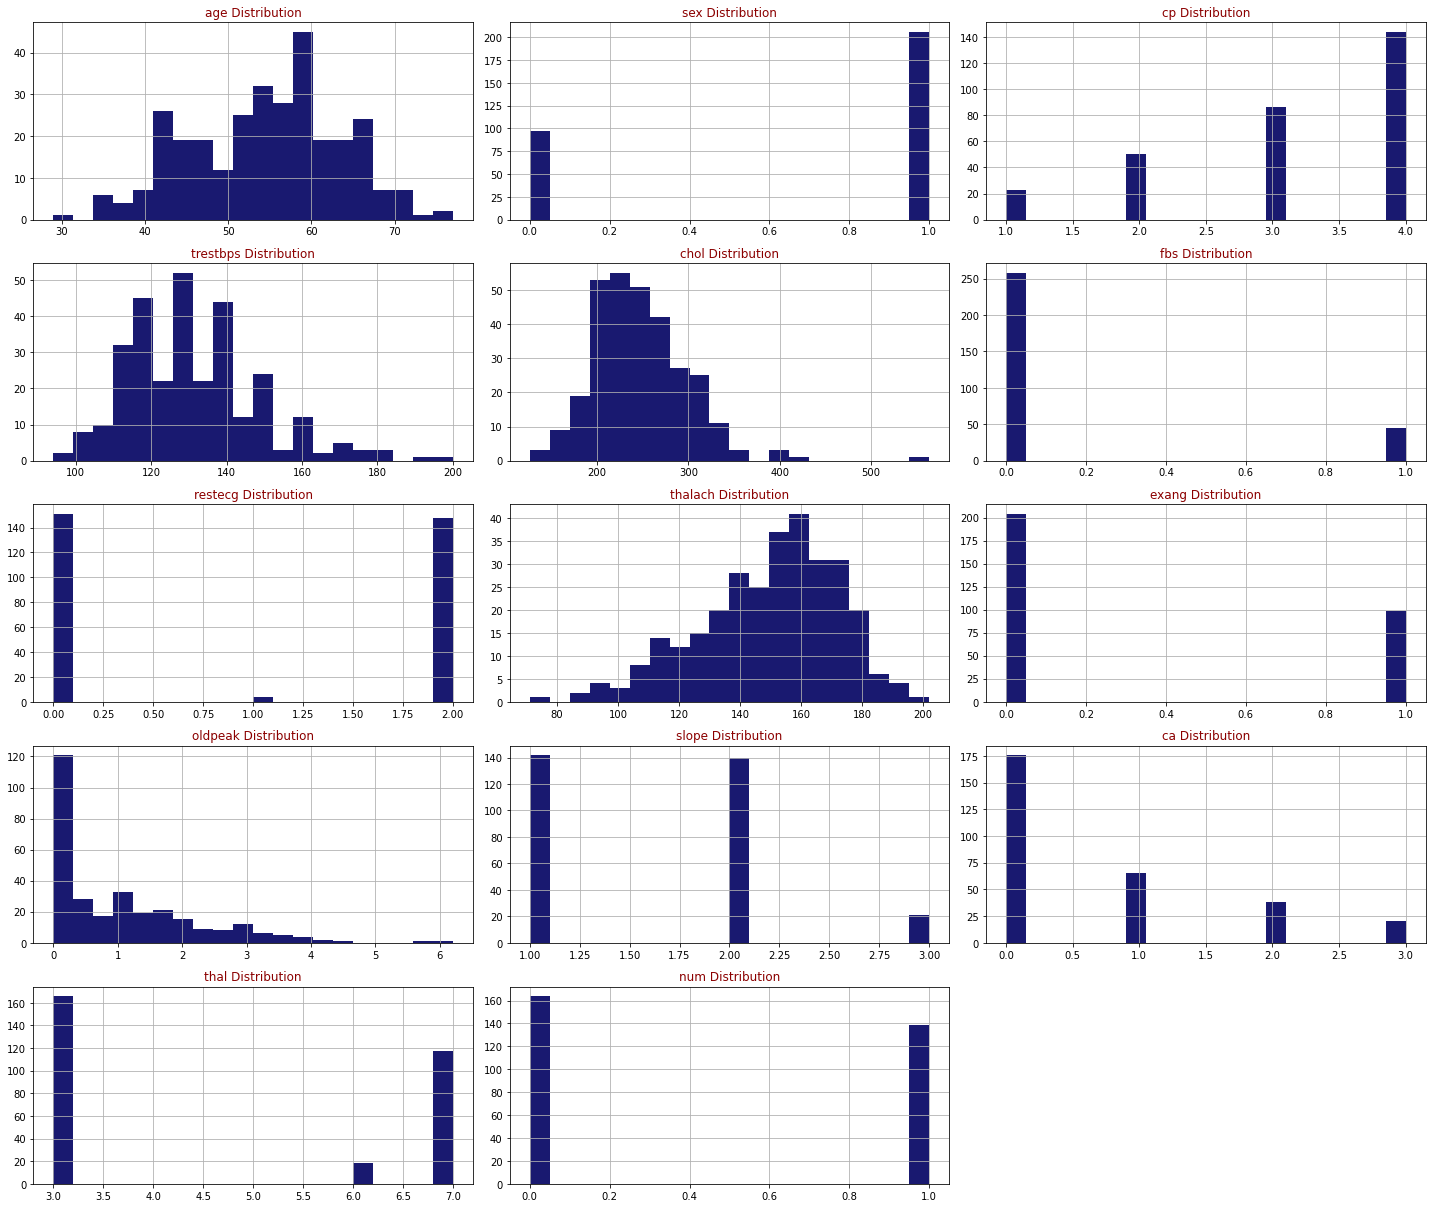

<AxesSubplot:xlabel='num', ylabel='count'>

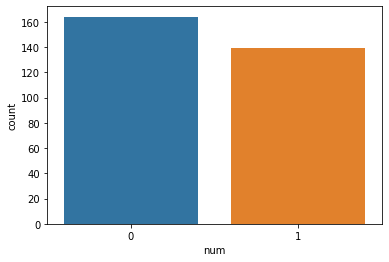

In [27]:

#exploring the dataset
import matplotlib.pyplot as plt
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(dataset,dataset.columns,6,3)


dataset.num.value_counts()
import seaborn as sn
sn.countplot(x='num',data=dataset)

Text(0, 0.5, 'num')

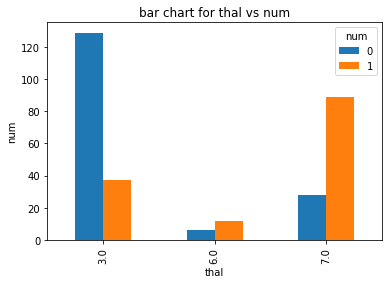

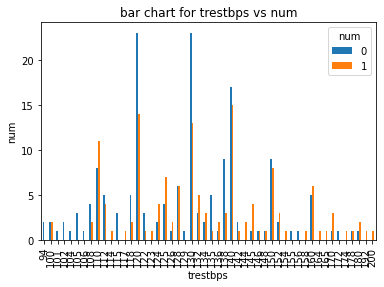

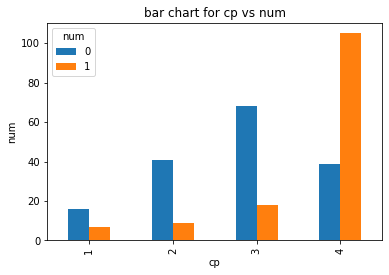

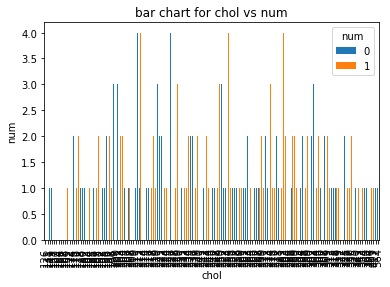

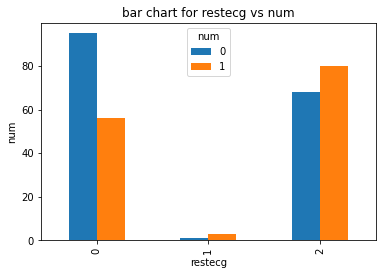

In [28]:
#VISULAIZATIONS----relationship between attributes

pd.crosstab(dataset.thal,dataset.num).plot(kind='bar')
plt.title('bar chart for thal vs num')
plt.xlabel('thal')
plt.ylabel('num')

pd.crosstab(dataset.trestbps,dataset.num).plot(kind='bar')
plt.title('bar chart for trestbps vs num')
plt.xlabel('trestbps')
plt.ylabel('num')

pd.crosstab(dataset.cp,dataset.num).plot(kind='bar')
plt.title('bar chart for cp vs num')
plt.xlabel('cp')
plt.ylabel('num')

pd.crosstab(dataset.chol,dataset.num).plot(kind='bar')
plt.title('bar chart for chol vs num')
plt.xlabel('chol')
plt.ylabel('num')

pd.crosstab(dataset.restecg,dataset.num).plot(kind='bar')
plt.title('bar chart for restecg vs num')
plt.xlabel('restecg')
plt.ylabel('num')

In [29]:
####------------similarly can be seen for all the attributes------------------

#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression
classifier =LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

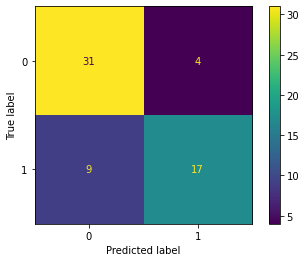

In [30]:
y_Class_pred=classifier.predict(X_test)

#checking the accuracy for predicted results

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_Class_pred)

# Making and display the Confusion Matrix

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_Class_pred)
ConfusionMatrixDisplay.from_predictions(
   Y_test, y_Class_pred)

In [31]:
#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_Class_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.81      0.65      0.72        26

    accuracy                           0.79        61
   macro avg       0.79      0.77      0.78        61
weighted avg       0.79      0.79      0.78        61



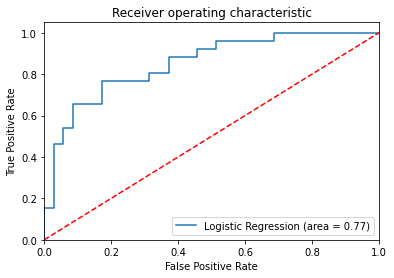

In [32]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()